In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import matplotlib.ticker as mticker
import pandas as pd
from datetime import datetime
#from ta import *
from talib import RSI,BBANDS,MA_Type
from scipy.signal import find_peaks

# Importing price 

In [2]:
data_btc1h=pd.read_csv("../exchange_data/Binance_BTCUSDT_1h.csv", parse_dates=True)
data_eth1h=pd.read_csv("../exchange_data/Binance_ETHUSDT_1h.csv", parse_dates=True)

In [3]:
data_btc1h.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT
0,2019-08-18 05-PM,BTCUSDT,10414.40,10438.98,10375.47,10375.47,545.50,5676600.05
1,2019-08-18 04-PM,BTCUSDT,10386.42,10467.47,10386.41,10414.40,1033.69,10787654.49
2,2019-08-18 03-PM,BTCUSDT,10374.90,10434.09,10370.87,10386.42,1362.57,14177404.30
3,2019-08-18 02-PM,BTCUSDT,10429.84,10500.00,10368.88,10374.90,1536.84,16046319.11
4,2019-08-18 01-PM,BTCUSDT,10375.15,10498.00,10370.80,10429.84,1466.31,15283696.74


In [4]:
data_eth1h.head()

,,,,,,Timestamps are UTC timezone,https://www.CryptoDataDownload.com
Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USDT
2019-08-18 05-PM,ETHUSDT,196.43,197.85,195.66,196.12,9190.67,1807502.8
2019-08-18 04-PM,ETHUSDT,193.83,197.91,193.83,196.43,13942.46,2736099.08
2019-08-18 03-PM,ETHUSDT,192.95,194.91,192.91,193.83,8303.55,1611773.6
2019-08-18 02-PM,ETHUSDT,194.03,195.15,192.63,192.95,11439.45,2216874.56


# Calculating RSI

In [5]:
data_btc1h['rsi']= RSI(data_btc1h['Close'], timeperiod=14)


# Calculating BBands

In [6]:
data_btc1h['upper'], data_btc1h['middle'], data_btc1h['lower'] = BBANDS(data_btc1h['Close'], matype=MA_Type.T3)

# Checking rsi and bbands

In [7]:
data_btc1h.tail()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,rsi,upper,middle,lower
17553,2017-08-17 08-AM,BTCUSDT,4349.99,4377.85,4333.32,4360.69,0.9499,4139.70,52.262519,4509.703015,4441.431920,4373.160824
17554,2017-08-17 07-AM,BTCUSDT,4324.35,4349.99,4287.41,4349.99,4.4400,19241.06,51.101797,4516.258605,4426.927302,4337.595999
17555,2017-08-17 06-AM,BTCUSDT,4315.32,4345.45,4309.37,4324.35,7.2300,31282.31,48.331738,4512.617895,4404.685581,4296.753267
17556,2017-08-17 05-AM,BTCUSDT,4308.83,4328.69,4291.37,4315.32,23.2300,100304.82,47.358092,4470.891359,4379.600542,4288.309724
17557,2017-08-17 04-AM,BTCUSDT,16199.91,16199.91,4261.32,4308.83,44.5100,190952.85,46.631006,4395.745807,4355.544160,4315.342513


# Reversing data

In [8]:
data_btc1h = data_btc1h.iloc[::-1]
#data_btc1h = data_btc1h.sort_index(ascending=True, axis=0)
##data_btc1h.sort_values(by= ascending=True)
#data_btc1h.set_index('Date')
data_btc1h.index = data_btc1h.index[::-1]
data_btc1h.tail()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,rsi,upper,middle,lower
17553,2019-08-18 01-PM,BTCUSDT,10375.15,10498.00,10370.80,10429.84,1466.31,15283696.74,NaN,NaN,NaN,NaN
17554,2019-08-18 02-PM,BTCUSDT,10429.84,10500.00,10368.88,10374.90,1536.84,16046319.11,NaN,NaN,NaN,NaN
17555,2019-08-18 03-PM,BTCUSDT,10374.90,10434.09,10370.87,10386.42,1362.57,14177404.30,NaN,NaN,NaN,NaN
17556,2019-08-18 04-PM,BTCUSDT,10386.42,10467.47,10386.41,10414.40,1033.69,10787654.49,NaN,NaN,NaN,NaN
17557,2019-08-18 05-PM,BTCUSDT,10414.40,10438.98,10375.47,10375.47,545.50,5676600.05,NaN,NaN,NaN,NaN


In [9]:
data_btc1h.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,rsi,upper,middle,lower
0,2017-08-17 04-AM,BTCUSDT,16199.91,16199.91,4261.32,4308.83,44.5100,190952.85,46.631006,4395.745807,4355.544160,4315.342513
1,2017-08-17 05-AM,BTCUSDT,4308.83,4328.69,4291.37,4315.32,23.2300,100304.82,47.358092,4470.891359,4379.600542,4288.309724
2,2017-08-17 06-AM,BTCUSDT,4315.32,4345.45,4309.37,4324.35,7.2300,31282.31,48.331738,4512.617895,4404.685581,4296.753267
3,2017-08-17 07-AM,BTCUSDT,4324.35,4349.99,4287.41,4349.99,4.4400,19241.06,51.101797,4516.258605,4426.927302,4337.595999
4,2017-08-17 08-AM,BTCUSDT,4349.99,4377.85,4333.32,4360.69,0.9499,4139.70,52.262519,4509.703015,4441.431920,4373.160824


# plotting data

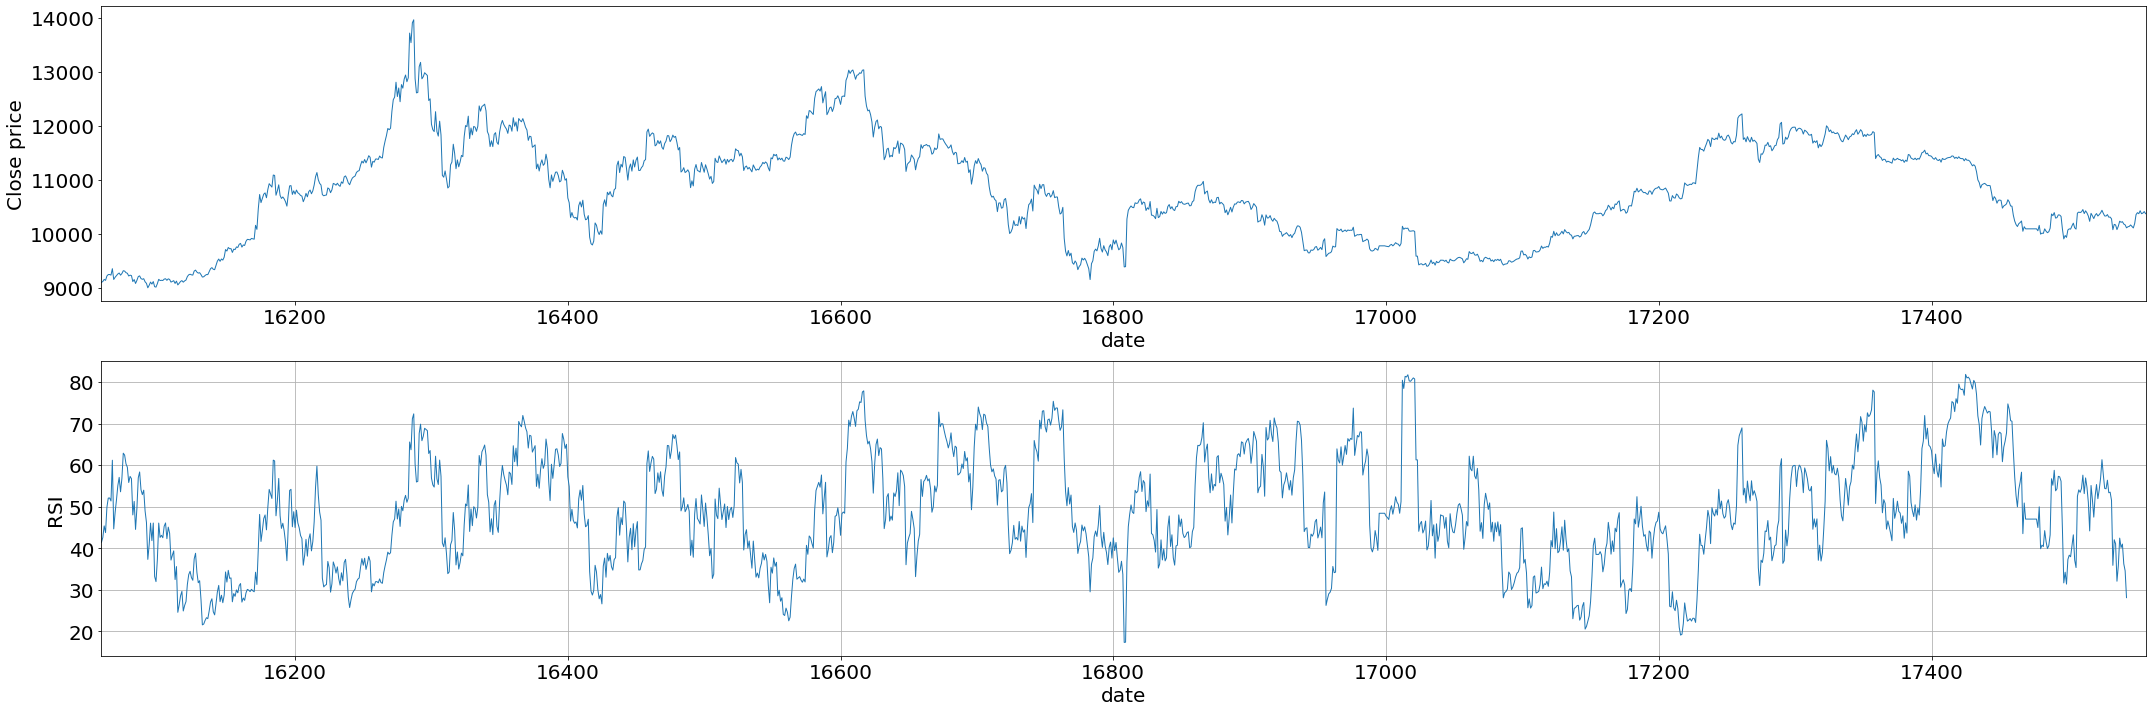

In [10]:
plt.figure()
plt.subplot(2, 1, 1)
data_btc1h['Close'].iloc[-1500:].plot(figsize=(30,10), linewidth=1, fontsize=20)
plt.xlabel('date',fontsize=20)
plt.ylabel('Close price',fontsize=20)

plt.subplot(2, 1, 2)
data_btc1h['rsi'].iloc[-1500:].plot(figsize=(30,10), linewidth=1, fontsize=20)
plt.xlabel('date',fontsize=20)
plt.ylabel('RSI',fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.show()

# Finding peaks

In [36]:
price_set=data_btc1h['Close'].iloc[1000:1300].to_numpy()
rsi_set=data_btc1h['rsi'].iloc[1000:1300].to_numpy()
peaks_price, _ = find_peaks(price_set, prominence=42)
peaks_rsi, _ = find_peaks(rsi_set, prominence=2)

npeaks_price, _ = find_peaks(-price_set, prominence=42)
npeaks_rsi, _ = find_peaks(-rsi_set, prominence=2)

<Figure size 432x288 with 0 Axes>

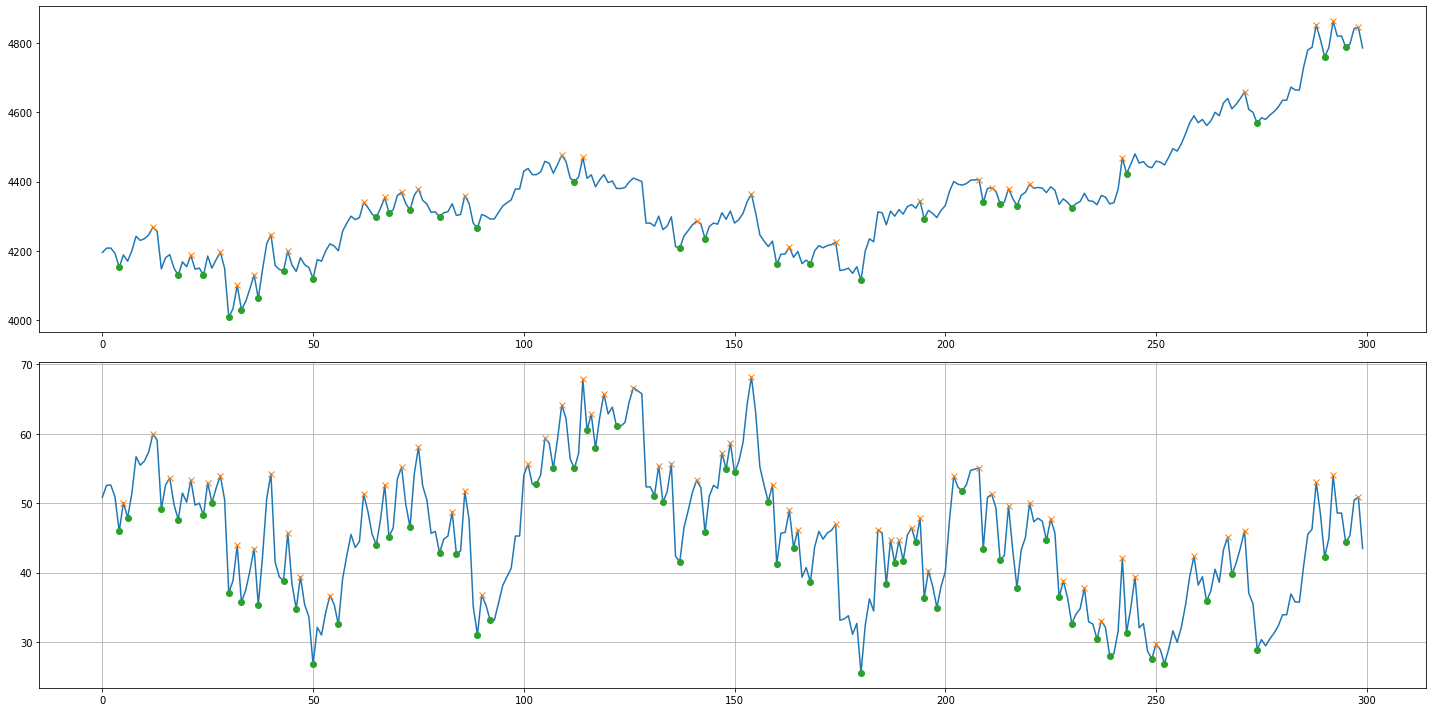

In [37]:
plt.figure()

plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(price_set)
plt.plot(peaks_price,price_set[peaks_price],"x")
plt.plot(npeaks_price,price_set[npeaks_price],"o")

plt.subplot(2, 1, 2)
plt.plot(rsi_set)
plt.plot(peaks_rsi,rsi_set[peaks_rsi],"x")
plt.plot(npeaks_rsi,rsi_set[npeaks_rsi],"o")

plt.grid(True)
plt.tight_layout()
plt.show()

# Detecting divergences

In [13]:
# Detecting bearish divergences

bearish_div=list()
ref_price=list()
ref_rsi= list()

bullish_div=list()
nref_price=list()  # negative peaks in price
nref_rsi= list()  # negative peaks in rsi

# defining window size


# Detecting bearish divergences            

for ni, nitem in enumerate(npeaks_price):
    nref_price.append(price_set[nitem])
    nref_rsi.append(rsi_set[nitem]) 

for nj in range(len(nref_price)): 
    #print(ni,nj,ni-nj)
    #if nj==ni-n_window+1 : break
    print('Price', price_set[-1], nref_price[nj])
    print('RSI', rsi_set[-1], nref_rsi[nj])
    if (price_set[-1]-nref_price[nj])<=0 and (rsi_set[-1]-nref_rsi[nj])>=0 : 
        bullish_div.append([nref_price[nj], nref_rsi[nj]])


Price 3904.99 4164.52
RSI 58.09690795683397 44.27482595343795
Price 3904.99 4293.15
RSI 58.09690795683397 65.20409306111232
Price 3904.99 4094.25
RSI 58.09690795683397 59.653403624635324
Price 3904.99 3820.02
RSI 58.09690795683397 51.766200211465254


In [14]:
print(bullish_div)

[[4164.52, 44.27482595343795]]


In [236]:
print(bullish_div)

[[3975.69, 41.29200306523371], [3986.87, 44.05559656883036], [3957.6, 38.71587428560282], [3972.05, 34.405671568888124], [4082.53, 47.21334468574273], [4063.35, 48.29567040734858], [3982.96, 50.13157689487502]]


In [237]:
bear_div=np.array(bearish_div).flatten()
bear_div


array([], dtype=float64)

plt.figure()

plt.figure(figsize=(20, 10))

ax1= plt.subplot(211)
plt.plot(price_set)
plt.plot(peaks_price,price_set[peaks_price],"x")
plt.plot(bear_div,price_set[bear_div],"o")
plt.xlabel('date',fontsize=20)
plt.ylabel('Close price',fontsize=20)
plt.grid(True)
plt.tight_layout()

ax2 = plt.subplot(212,sharex = ax1)
plt.plot(rsi_set)
plt.plot(peaks_rsi,rsi_set[peaks_rsi],"x")
plt.plot(bear_div,rsi_set[bear_div],"o")
plt.xlabel('date',fontsize=20)
plt.ylabel('RSI',fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting bullish divergences with arrows

In [ ]:
plt.figure()

plt.figure(figsize=(20, 10))

ax1= plt.subplot(211)
plt.plot(price_set)
plt.plot(peaks_price,price_set[peaks_price],"x")
for i in range(0,len(bearish_div)):
    plt.plot(bearish_div[i],price_set[bearish_div[i]],"ro-")
plt.xlabel('date',fontsize=20)
plt.ylabel('Close price',fontsize=20)
plt.grid(True)
plt.tight_layout()

ax2 = plt.subplot(212,sharex = ax1)
plt.plot(rsi_set)
plt.plot(peaks_rsi,rsi_set[peaks_rsi],"x")
for i in range(0,len(bearish_div)):
    plt.plot(bearish_div[i],rsi_set[bearish_div[i]],"ro-")

plt.xlabel('date',fontsize=20)
plt.ylabel('RSI',fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting bullish divergences with arrows

In [ ]:
plt.figure()

plt.figure(figsize=(20, 10))

ax1= plt.subplot(211)
plt.plot(price_set)
plt.plot(npeaks_price,price_set[npeaks_price],"x")
for i in range(0,len(bullish_div)):
    plt.plot(bullish_div[i],price_set[bullish_div[i]],"go-")
plt.xlabel('date',fontsize=20)
plt.ylabel('Close price',fontsize=20)
plt.grid(True)
plt.tight_layout()

ax2 = plt.subplot(212,sharex = ax1)
plt.plot(rsi_set)
plt.plot(npeaks_rsi,rsi_set[npeaks_rsi],"x")
for i in range(0,len(bullish_div)):
    plt.plot(bullish_div[i],rsi_set[bullish_div[i]],"go-")

plt.xlabel('date',fontsize=20)
plt.ylabel('RSI',fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

# Writing the div detection function

In [80]:
def detect_div_v1(price_set,rsi_set,nwindow=5,price_pk_prominence=40,rsi_pk_prominence=2):
    
    # calculating peaks indices
    peaks_price, _ = find_peaks(price_set, prominence=price_pk_prominence)
    peaks_rsi, _ = find_peaks(rsi_set, prominence=rsi_pk_prominence)
    # calculating negative peaks indices
    npeaks_price, _ = find_peaks(-price_set, prominence=price_pk_prominence)
    npeaks_rsi, _ = find_peaks(-rsi_set, prominence=rsi_pk_prominence)
    
    d=dict()
    # defining window size
    n_window=nwindow
    
    # Detecting bearish divergences  
    bearish_div=list()
    bullish_div=list()
    ref_price=list() # positive peaks in price
    ref_rsi= list()  # positive peaks in rsi
    nref_price=list()  # negative peaks in price
    nref_rsi= list()  # negative peaks in rsi

    for ni, nitem in enumerate(npeaks_price):
        nref_price.append(price_set[nitem])
        nref_rsi.append(rsi_set[nitem]) 
        for nj in range(ni-1,0,-1): 
            #print(ni,nj,ni-nj)
            if nj==ni-n_window+1 : break
            if (nref_price[ni]-nref_price[nj])<=0 and (nref_rsi[ni]-nref_rsi[nj])>=0 : 
                #bullish_div.append([npeaks_price[ni],npeaks_price[nj]])
                return "bull"
    
    for i, item in enumerate(peaks_price):
        ref_price.append(price_set[item])
        ref_rsi.append(rsi_set[item]) 
        for j in range(i-1,0,-1): 
            #print(i,j,i-j)
            if j==i-n_window+1 : break
            if (ref_price[i]-ref_price[j])>=0 and (ref_rsi[i]-ref_rsi[j])<=0 : 
                #bearish_div.append([peaks_price[i],peaks_price[j]])   
                return "bear"


# Testing divergence detection function

In [19]:
def BEAR_DIV(price_set, rsi_set, price_pk_prominence=42, window=2):
    from scipy.signal import find_peaks

    peaks_price, _ = find_peaks(price_set, prominence=price_pk_prominence)
    ref_price = [price_set[item]
                 for item in peaks_price] 
    ref_rsi = [rsi_set[item]
               for item in peaks_price]

    for i in range(len(ref_price)-1, 0, -1):
        if ref_price[-1] > ref_price[i] and ref_rsi[-1] < ref_rsi[i]:
            if price_set[-1] < ref_price[-1]:
                return 'bear'

In [23]:
BEAR_DIV(price_set, rsi_set)

'bear'